In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

In [11]:
import pandas as pd

df = pd.read_csv(r"CM_players.csv", sep=',')
df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,preferred_foot,attacking_work_rate,attacking_work_rate.1,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,161328,155862,30962,2016-03-31 00:00:00,87,right,high,medium,74,60,...,63,68,85,89,90,11,8,9,7,11
1,81110,183907,36183,2016-01-14 00:00:00,87,right,medium,medium,69,34,...,74,46,84,90,91,7,12,15,6,5
2,101109,184344,24235,2016-05-12 00:00:00,83,right,medium,high,44,37,...,66,61,84,86,86,2,2,3,2,4
3,62978,152729,37482,2015-10-16 00:00:00,85,right,high,medium,57,64,...,62,69,86,87,83,10,11,14,15,8
4,43951,182493,56678,2016-01-28 00:00:00,86,right,medium,high,55,42,...,52,50,86,86,89,6,8,15,5,15


In [12]:
df.shape

(10, 41)

In [13]:
display(df.drop_duplicates())

,id,player_fifa_api_id,player_api_id,date,overall_rating,preferred_foot,attacking_work_rate,attacking_work_rate.1,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,161328,155862,30962,2016-03-31 00:00:00,87,right,high,medium,74,60,...,63,68,85,89,90,11,8,9,7,11
1,81110,183907,36183,2016-01-14 00:00:00,87,right,medium,medium,69,34,...,74,46,84,90,91,7,12,15,6,5
2,101109,184344,24235,2016-05-12 00:00:00,83,right,medium,high,44,37,...,66,61,84,86,86,2,2,3,2,4
3,62978,152729,37482,2015-10-16 00:00:00,85,right,high,medium,57,64,...,62,69,86,87,83,10,11,14,15,8
4,43951,182493,56678,2016-01-28 00:00:00,86,right,medium,high,55,42,...,52,50,86,86,89,6,8,15,5,15
5,118875,178603,36388,2016-01-14 00:00:00,86,right,high,medium,64,55,...,79,68,86,87,86,15,6,10,5,6
6,169806,164240,80562,2015-09-21 00:00:00,88,right,high,high,60,38,...,74,71,90,91,89,9,12,5,9,10
7,172706,184087,160599,2016-03-17 00:00:00,82,right,medium,medium,64,45,...,60,60,85,87,83,16,6,14,16,14
8,84768,203574,263653,2016-01-21 00:00:00,77,right,high,medium,62,29,...,59,37,79,80,81,7,15,11,10,8
9,64461,138956,41884,2016-05-05 00:00:00,86,left,low,high,52,33,...,46,50,90,90,90,3,3,2,4,3


In [14]:
df.nlargest(10, ['overall_rating'])

,id,player_fifa_api_id,player_api_id,date,overall_rating,preferred_foot,attacking_work_rate,attacking_work_rate.1,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
6,169806,164240,80562,2015-09-21 00:00:00,88,right,high,high,60,38,...,74,71,90,91,89,9,12,5,9,10
0,161328,155862,30962,2016-03-31 00:00:00,87,right,high,medium,74,60,...,63,68,85,89,90,11,8,9,7,11
1,81110,183907,36183,2016-01-14 00:00:00,87,right,medium,medium,69,34,...,74,46,84,90,91,7,12,15,6,5
4,43951,182493,56678,2016-01-28 00:00:00,86,right,medium,high,55,42,...,52,50,86,86,89,6,8,15,5,15
5,118875,178603,36388,2016-01-14 00:00:00,86,right,high,medium,64,55,...,79,68,86,87,86,15,6,10,5,6
9,64461,138956,41884,2016-05-05 00:00:00,86,left,low,high,52,33,...,46,50,90,90,90,3,3,2,4,3
3,62978,152729,37482,2015-10-16 00:00:00,85,right,high,medium,57,64,...,62,69,86,87,83,10,11,14,15,8
2,101109,184344,24235,2016-05-12 00:00:00,83,right,medium,high,44,37,...,66,61,84,86,86,2,2,3,2,4
7,172706,184087,160599,2016-03-17 00:00:00,82,right,medium,medium,64,45,...,60,60,85,87,83,16,6,14,16,14
8,84768,203574,263653,2016-01-21 00:00:00,77,right,high,medium,62,29,...,59,37,79,80,81,7,15,11,10,8


In [15]:
df.drop('potential', axis=1, inplace=True)


KeyError: "['potential'] not found in axis"

In [16]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'preferred_foot', 'attacking_work_rate', 'attacking_work_rate.1',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

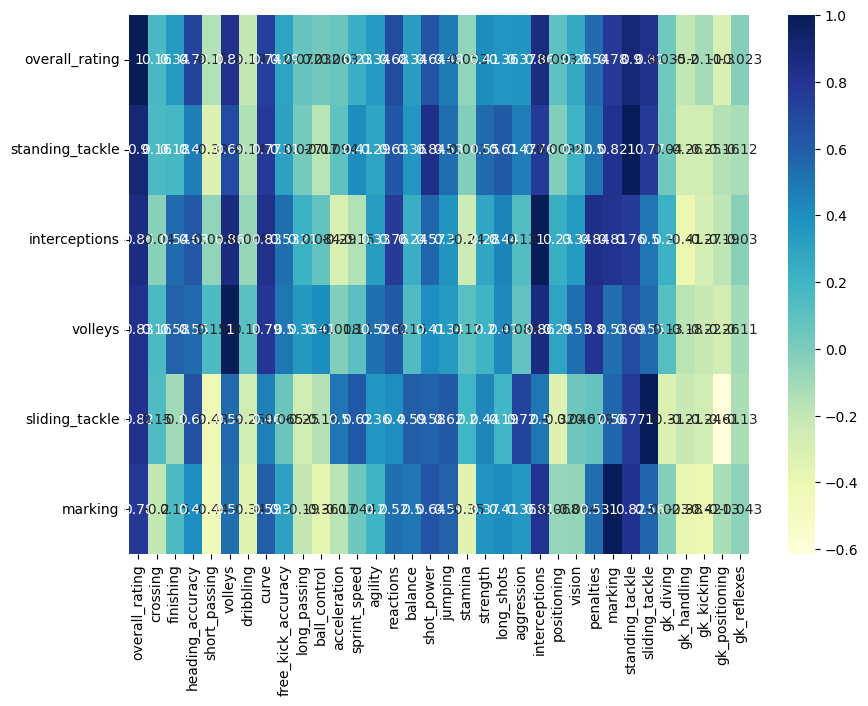

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Select the numeric columns for correlation computation
numeric_columns = ['overall_rating', 'crossing', 'finishing', 'heading_accuracy',
                   'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                   'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                   'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                   'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                   'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                   'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Filter the DataFrame to include only the numeric columns
numeric_df = df[numeric_columns]

plt.figure(figsize=(10,7))
corr_matrix = numeric_df.corr()
top_correlations = corr_matrix.nlargest(6, 'overall_rating')
sb.heatmap(top_correlations, cmap="YlGnBu", annot=True)
plt.show()

